# Quantum Neural Networks

Neural networks and all its specialized architectures such as ConvNets, LSTMs, ResNets, and GANs are part of a broader idea called **differental computing.** Differentible computing is computation carried out using functions with known gradients. These functions have adjustable parameters, and the gradients tell us how to adjust those parameters so that the function performs in a desired manner. 

> A quantum neural network is any quantum circuit with trainable continuous parameters.

In NISQ-era, quantum computing is increasingly being viewed as a form of differential computing. After all, quantum computing is just linear algebra in higher dimensional space.

<center>
<figure>
    <img src="./images/qnn_example_circuit.webp", width="60%">
    <figcaption>A quantum circuit whose gates have free parameters. These can be trained the same way as a deep neural network.</figcaption>
</figure>
</center>

These circuits also go by the name **variational quantum circuits** as they were initially proposed for chemistry problems as **variational quantum eigensolvers (VQEs).**

**PennyLane**, a leading software package for quantum machine learning, provides two key features:
- Automatic differentiation for quantum circuits
- QNode abstraction for building hybrid classical-quantum circuits

### Comparison of some available quantum software libraries

<center>
<figure>
    <img src="./images/qnn_tools.webp", width="50%">
    <figcaption>Comparison of some available quantum software libraries.</figcaption>
</figure>
</center>

## Example Circuit: Training a quantum circuit with PennyLane and PyTorch

In [2]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

import qutip as qt
import imageio

### Defining the quantum circuit

One with Expectation value as output for training, and the other with the quantum state as output foor simulation.

In [3]:
dev = qml.device("lightning.qubit", wires=1)

# Trainable quantum circuit
@qml.qnode(dev, interface="torch")
def circuit(phi, theta):
    qml.RX(theta, wires=0)
    qml.RZ(phi, wires=0)
    return qml.expval(qml.PauliZ(0))

@qml.qnode(dev, interface="torch")
def circuit_states(phi, theta):
    qml.RX(theta, wires=0)
    qml.RZ(phi, wires=0)
    return qml.state()

### Visualizing the Circuit

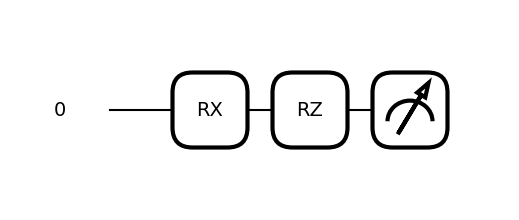

In [4]:
params = np.random.random(2)
# print(qml.draw(circuit)(*params))
qml.draw_mpl(circuit)(*params)
plt.show()

### Define the cost function to minimize

The target defined in the cost function itself, where the polarity changes after every 100 steps.

In [5]:
def cost(phi, theta, step):
    target = -(-1) ** (step//100)
    return torch.abs(circuit(phi, theta)-target)**2

### Training

In [6]:
phi = Variable(torch.tensor(1.), requires_grad=True)
theta = Variable(torch.tensor(0.5), requires_grad=True)
opt = torch.optim.Adam([phi, theta], lr=0.1)

states = []

for i in range(400):
    states.append(circuit_states(phi, theta))
    opt.zero_grad()
    loss = cost(phi, theta, i)
    loss.backward()
    opt.step()
states.append(circuit_states(phi, theta))

### Making and saving bloch diagrams

In [7]:
b = qt.Bloch()
dst = "images/bloch/"
paths = []

for i in range(len(states)):
    b.clear()
    s = qt.Qobj(states[i].detach().numpy())
    b.add_states(s)
    paths.append(f"{dst}{i}.png")
    b.save(dst + f"{i}")

### Merging all the bloch images into a GIF

In [8]:
images = []
for filename in paths:
    images.append(imageio.imread(filename))
writer = imageio.get_writer('images/bloch.mp4', fps=20)
for im in images:
    writer.append_data(im)
writer.close()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6852\2610086272.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (500, 500) to (512, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


### Output GIF

![bloch](images/bloch.gif)

# QNN for IRIS

### Get the required data

In [9]:
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

import pennylane as qml
from 

# Data Preprocessing - Filter

In [10]:
is_data_reduced = True        # Data is reduced to n classes
reduced_classes = [1,2,3,7]   # Selected (and sorted) classes

# Number of reduced classes
reduced_num_classes = len(reduced_classes)

# filtering classes
def filter_classes(y):
    return np.array(list(map(lambda x: x in reduced_classes, y)))
train_cond = filter_classes(y_train)
test_cond = filter_classes(y_test)
x_train, y_train = x_train[train_cond], y_train[train_cond]
x_test, y_test = x_test[test_cond], y_test[test_cond]

# Variational Quantum Cirucit

In [11]:
n_qubits = 6                  # Number of qubits
num_layers = 8                # Number of layers

dev = qml.device("default.qubit", wires = n_qubits)

@qml.qnode(dev, diff_method='adjoint')
def circuit(weights, inputs=None):
  ''' Quantum QVC Circuit'''

  # Splits need to be done through the tensorflow interface
  weights_each_layer = tf.split(weights, num_or_size_splits=num_layers, axis=0)
  
  # Input normalization
  inputs_1 = inputs / p_np.sqrt(max(p_np.sum(inputs ** 2, axis=-1), 0.001))

  for i, W in enumerate(weights):
    # Data re-uploading technique
    if i % 2 == 0:
      MottonenStatePreparation(inputs_1, wires = range(n_qubits))
    
    # Neural network layer
    StronglyEntanglingLayers(weights_each_layer[i], wires=range(n_qubits))
  
  # Measurement return
  return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)] 

In [12]:
weight_shapes = {"weights": (num_layers,n_qubits,3)}

# Model  
input_m = tf.keras.layers.Input(shape=(2 ** n_qubits,), name = "input_0")
keras_1 = qml.qnn.KerasLayer(circuit, weight_shapes, output_dim=n_qubits, name = "keras_1")(input_m)
output = tf.keras.layers.Dense(num_classes_q, activation='softmax', name = "dense_1")(keras_1)

# Model creation
model = tf.keras.Model(inputs=input_m, outputs=output, name="mnist_quantum_model")

# Model compilation
model.compile(
  loss='categorical_crossentropy',
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01) ,
  metrics=[tf.keras.metrics.CategoricalAccuracy()]
)

ValueError: Unrecognized keyword arguments passed to KerasLayer: {'dynamic': True}

## Resources

- [Medium Article - Nathan Killoran, Josh Izaac](https://medium.com/xanaduai/training-quantum-neural-networks-with-pennylane-pytorch-and-tensorflow-c669108118cc)
- [Medium - Hybrid QNN for reduced MNIST data](https://towardsdatascience.com/hybrid-quantum-neural-network-for-reduced-mnist-data-840897ad08a)
- [Q-munity - Intermediate QNN](https://www.qmunity.tech/tutorials/quantum-neural-networks)
- [QNN - A Practical Approach - Piotr Gawron](https://conference.ippp.dur.ac.uk/event/929/attachments/3968/4559/piotr_gawron_quantum_neural_networks.pdf)
- [QNN Dropout - PennyLane Tutorial](https://pennylane.ai/qml/demos/tutorial_quantum_dropout/)